### Dataset: 2019 and 2020 stackoverflow surveys

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#dataset 2020 Survey df
df = pd.read_csv('developer_survey_2020/survey_results_public.csv')
schema = pd.read_csv('developer_survey_2020/survey_results_schema.csv')

df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [7]:
#dataset 2017 Survey df2
df2 = pd.read_csv('developer_survey_2019/survey_results_public.csv')
schema2 = pd.read_csv('developer_survey_2019/survey_results_schema.csv')


## Data understanding 
stats about numerical data shows that 
>stackoverflow age is around 30 but shows high standard deviation

>stackoverflow coders are working around 40-42 hours per week 



In [8]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [9]:
df2.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


## Data preparation
Since we are interested in comparing 2019 and 2020 surveys we need to be sure that all the features we are interested are shared in both surveys. Therefore, we create a list for shared columns for these two surveys. Then we create sub dataset having these shared columns. 

In [10]:
#create list for common columns of two surveys 
list2020=list(df.columns)
list2019=list(df2.columns)
sharedcols=list(set(list2020).intersection(list2019))
print(sharedcols)

['WelcomeChange', 'OrgSize', 'MainBranch', 'PlatformDesireNextYear', 'Hobbyist', 'DatabaseWorkedWith', 'MiscTechDesireNextYear', 'CurrencyDesc', 'WorkWeekHrs', 'SOComm', 'PlatformWorkedWith', 'SOPartFreq', 'JobSat', 'Sexuality', 'DatabaseDesireNextYear', 'SurveyEase', 'LanguageDesireNextYear', 'CompFreq', 'DevType', 'Ethnicity', 'Age', 'YearsCode', 'UndergradMajor', 'Respondent', 'Country', 'SOAccount', 'SurveyLength', 'PurchaseWhat', 'JobFactors', 'CompTotal', 'CurrencySymbol', 'Age1stCode', 'EdLevel', 'Gender', 'ConvertedComp', 'Employment', 'YearsCodePro', 'MiscTechWorkedWith', 'SOVisitFreq', 'OpSys', 'LanguageWorkedWith', 'Trans', 'JobSeek']


In [14]:
#To be able to compare two dataset we create sub dataframe with shared columns from both 2019 and 2020
df_sub=df[sharedcols]
df2_sub=df2[sharedcols]


In [25]:
#remove rows with missing values in the columns that are going to be analyzed. We would like to draw conclusions from the participants from those features. 
df_sub_clean=df_sub.dropna(axis=0,subset=['JobSat','Gender','EdLevel','Country'])
df2_sub_clean=df2_sub.dropna(axis=0,subset=['JobSat','Gender','EdLevel','Country'])

# Business understanding: 
Questions to be answered:
* Q1. What is the minorty and women percentage in stackoverflow? Is there any change from 2019 to 2020? 
* Q2. According to Education Level which group has the highest average of Job Stasifaction? Has it changed from 2019 to 2020?
* Q3. Has the top 10 Countries changed from 2019 to 2020? What is the percentage of the rest of the countries? 




## Q1. What is the minorty and women percentage in stackoverflow? Is there any change from 2019 to 2020? 
* First, all non-binary gender groups are merged and labeled with 2. Women labelled as 1 and man as 0.
* Then, percentages of these three groups are calculated to represent gender dominance for both 2019 and 2020 survey data.
* 2019 and 2020 survey participants are compared with these three gender groups in a bar plot.

### A1: Only 4-5% of stackoverflow community is women and non-binary group is less than 1 %! There is only 0.6 and 0.2 % increase from 2019 to 2020 for women and non-binary group, respectively.
(if we assume that surveyh participants represent the whole stackoverflow community)


In [16]:
df_sub_clean.Gender.unique()

array(['Man', 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [17]:
#List of column names of the categorical variables
L_Gender=list(df_sub_clean.Gender.unique())
Dict_Gender={'Man':0, 'Woman':1,
       'Non-binary, genderqueer, or gender non-conforming':2,
       'Woman;Non-binary, genderqueer, or gender non-conforming':2,
       'Man;Non-binary, genderqueer, or gender non-conforming':2,
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming':2,
       'Woman;Man':2}

df_sub_clean=df_sub_clean.replace({'Gender':Dict_Gender})
df2_sub_clean=df2_sub_clean.replace({'Gender':Dict_Gender})

Text(1.7, 10, '1.2-1.2 %')

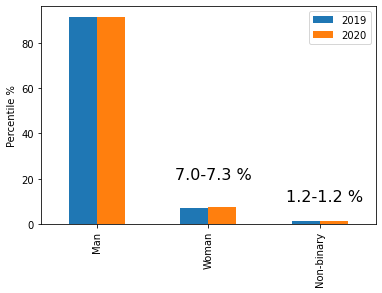

In [18]:
Gender2019=100*df2_sub_clean.groupby(['Gender']).size()/df2_sub_clean.groupby(['Gender']).size().sum()
Gender2020=100*df_sub_clean.groupby(['Gender']).size()/df_sub_clean.groupby(['Gender']).size().sum()
dfGender = pd.DataFrame({'2019': Gender2019.values,'2020': Gender2020.values}, index=['Man','Woman','Non-binary'])
ax = dfGender.plot.bar()
ax.set_ylabel('Percentile %')
ax.text(0.7, 20,str(Gender2019.values[1].round(1))+'-'+str(Gender2020.values[1].round(1))+' %', fontsize=16)
ax.text(1.7, 10,str(Gender2019.values[2].round(1))+'-'+str(Gender2020.values[2].round(1))+' %', fontsize=16)

### Q2. According to Education Level which group has the highest average of Job Stasifaction? Has it changed from 2019 to 2020?


### A2. As it can be seen from Bar plot below people with Doctoral degree has the highest jib satisfaction and their job satisfaction has increased from 2019 to 2020. Also the group with professional degree has the lowest job satisfacition in both 2019 and 2020. 
*  First, categorical column JobSatisfaction changed to Numeric with rate of satisfaction from -2 (Very dissatisfied) to 2 (Very Satisfied). 
* Then, 2019 and 2020 survey participants are compared in a bar plot according to Education Level. 


In [19]:
L_JobSat=list(df_sub_clean.JobSat.unique())
Dict_JobSat={'Very dissatisfied':-2,'Slightly dissatisfied':-1,'Neither satisfied nor dissatisfied':0,
             'Slightly satisfied':1,'Very satisfied':2}

df_sub_clean=df_sub_clean.replace({'JobSat':Dict_JobSat})
df2_sub_clean=df2_sub_clean.replace({'JobSat':Dict_JobSat})


In [20]:
df_sub_clean.JobSat.astype(int)
EdLevel2020=df_sub_clean.groupby(['EdLevel']).mean()['JobSat'].sort_values(ascending=False)
df2_sub_clean.JobSat.astype(int)
EdLevel2019=df2_sub_clean.groupby(['EdLevel']).mean()['JobSat'].sort_values(ascending=False)

Text(0, 0.5, 'Job Satisfaction')

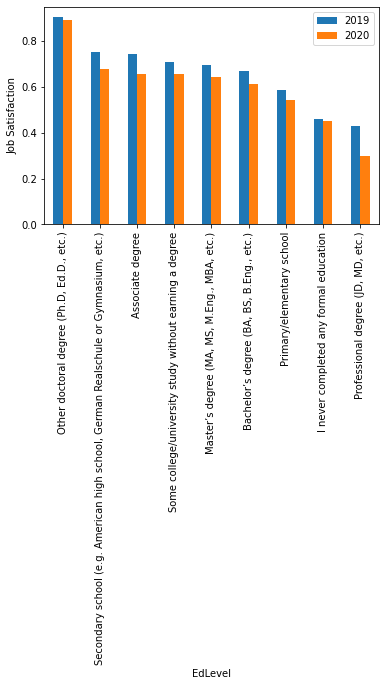

In [21]:
dfEdL = pd.DataFrame({'2019': EdLevel2019.values,
                   '2020': EdLevel2020.values}, index=EdLevel2019.index)
ax = dfEdL.plot.bar()
ax.set_ylabel('Job Satisfaction')

### Q3. Has the top 10 Countries changed from 2019 to 2020? What is the percentage of the rest of the countries? 

* First, cleaned dataframe is grouped by Country and top 10 countries percentages are calculated. 
* Then, 2019 and 2020 survey participants are compared in a bar plot according to Country of their origin. 
* The rest of the countries (other than top 10) are summed and sum is annotated in the bar plot ofr both 2019 and 2020.

### A3. 1.rank country is USA in both 2019 and 2020; however, there is a 3% decrease from 2019 to 2020. Other top 10 countries are increasing besides from UK (2nd). There is still a big difference of the stackoverflow profiles from other countries. Total nuumber of Top 3 countries is still 10% higher than total of the all the other countries. 


In [22]:
#Gender2019=100*df2_sub_clean.groupby(['Gender']).size()/df2_sub_clean.groupby(['Gender']).size().sum()
Country2019_others=(100*df2_sub_clean.groupby(['Country']).size()/df2_sub_clean.groupby(['Country']).size().sum()).sort_values(ascending=False)[10:]
Country2019=(100*df2_sub_clean.groupby(['Country']).size()/df2_sub_clean.groupby(['Country']).size().sum()).sort_values(ascending=False)[:10]
Country2020_others=(100*df_sub_clean.groupby(['Country']).size()/df_sub_clean.groupby(['Country']).size().sum()).sort_values(ascending=False)[10:]
Country2020=(100*df_sub_clean.groupby(['Country']).size()/df_sub_clean.groupby(['Country']).size().sum()).sort_values(ascending=False)[:10]


Text(5.7, 15, 'Other Countries\n Total:36.7-38.1 %')

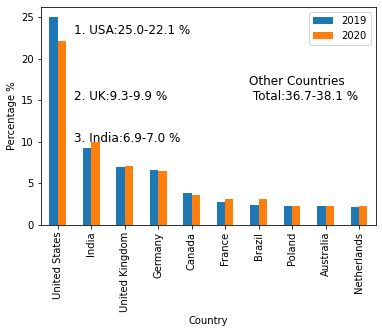

In [24]:
dCountry = pd.DataFrame({'2019': Country2019.values,'2020': Country2020.values}, index=Country2019.index)
ax = dCountry.plot.bar()
ax.set_ylabel('Percentage %')
ax.text(0.5, 23,'1. USA:'+str(Country2019.values[0].round(1))+'-'+str(Country2020.values[0].round(1))+' %', fontsize=12)
ax.text(0.5, 15,'2. UK:'+str(Country2019.values[1].round(1))+'-'+str(Country2020.values[1].round(1))+' %', fontsize=12)
ax.text(0.5, 10,'3. India:'+str(Country2019.values[2].round(1))+'-'+str(Country2020.values[2].round(1))+' %', fontsize=12)

ax.text(5.7, 15,'Other Countries\n Total:'+str(Country2019_others.sum().round(1))+'-'+str(Country2020_others.sum().round(1))+' %', fontsize=12)

## Results evaluation


* Women are still not represented in coding community. Minorty groups are not positively favored in coding community as well. There is no change from 2019 to 2020!
* Doctoral degree gaves job satisfaction and having only professional degree does not satisfy people in their jobs. 
* Although coders from USA populates stackoverflow other top 10 countries are increasing like India, Germany, Canada, Brazil and France. 